# Example Python code to create a map of Europe with points on it

### A few explanations:
In Python, putting a # before a line turns it into a comment. Comment out any line that you do not want
In this Notebook, Cells (or bits of code) can be executed by pressing SHIFT + ENTER

In [26]:
# Import packages

import gdal
from mpl_toolkits.basemap import Basemap

from matplotlib import cm
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt

% matplotlib inline
import os
from IPython.display import FileLink, FileLinks

/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:1777: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3300: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.4/dist-packages/mpl_toolkits/basemap/__init__.py:3309: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


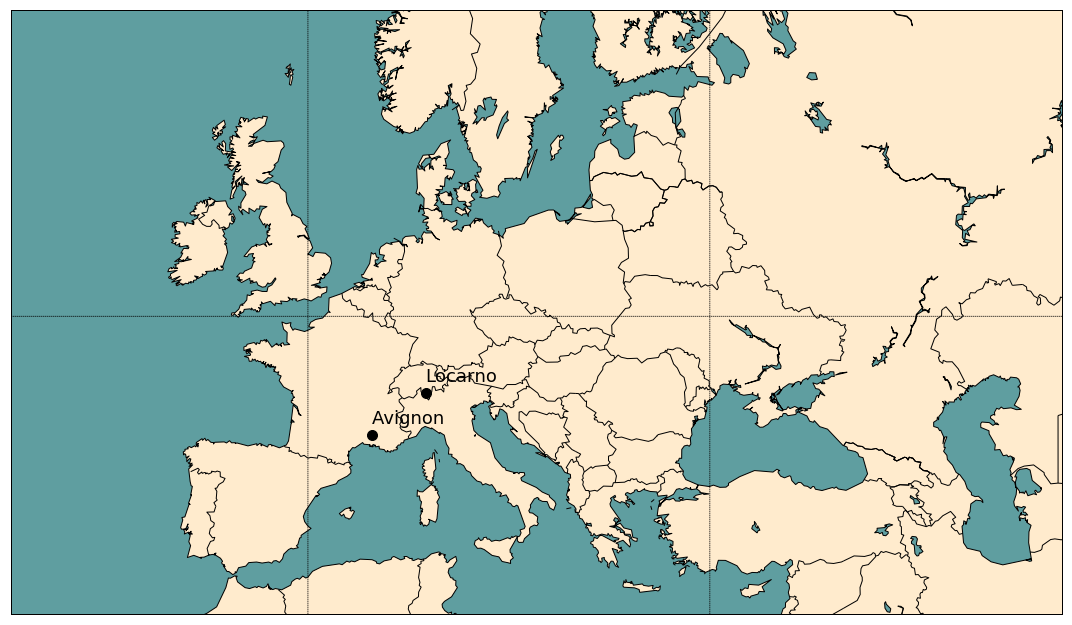

In [28]:
# create a figure and figure axes
fig, ax = plt.subplots(figsize = (15,10)) # <-- adapt the size here

# create a Basemap instance
# projection, string : possibilities include 'aeqd', 'laea' etc. For all possibilities and examples see: 
#    https://matplotlib.org/basemap/users/mapsetup.html
# lat_0, float : the latitude coordinate of the center of the map in WGS84
# lon_0, float : the longitude coordinate of the center of the map in WGS84
# resolution, string : the resolution of the map, either high (h) or low (l)
# llcrnrlon, float : the longitude coordinate of the lower left hand corner of the map
# llcrnrlat, float : the latitude coordinate of the lower left hand corner of the map
# urcrnrlon, float : the longitude coordinate of the upper right hand corner of the map
# urcrnrlat, float : the latitude coordinate of the upper right hand corner of the map

map = Basemap(projection='merc', lat_0 = 46.92366, lon_0 = 8.22313, resolution = 'l', 
             llcrnrlon = -22.1857, llcrnrlat = 33.564, urcrnrlon = 56.300, urcrnrlat = 62.545) 

# draw a line around the map region             
map.drawmapboundary(fill_color='cadetblue') # <-- fill_color changes the color of the Sea. Names of colours
                                           # can be found here: 
                                           # https://matplotlib.org/2.0.0/examples/color/named_colors.html

# draws the political boundaries
map.drawcountries(linewidth = 1.0, color = 'k') # <-- the linewidth and the colour of the lines can be changed.
                                                # 'k' is black, 'r' is red, 'b' is blue etc

# draws the coastlines
map.drawcoastlines(linewidth = 1.0, color = 'k')

# draw rivers
#map.drawrivers(linewidth = 1.0, color = 'aqua')

# colour the sea

# colour the land and the lakes
map.fillcontinents(color='blanchedalmond',lake_color='cadetblue') # <-- change the colours here

# draws a relief map, looks nice :-) , sometimes it's better to choose between fillcontinents and shadedrelief or 
# bluemarble

#map.shadedrelief() # <-- draws mountains etc
#map.bluemarble() # <-- looks like Google Earth, but very dark

# draw meridians and parallels

map.drawparallels(np.arange(10,90,20)) # <-- locations where to draw them. This means from 10 to 90 in steps of 20
map.drawmeridians(np.arange(-180,180,30))

# This is the important part: putting points on the map

latp = [43.94834, 46.17086] # <-- latitude coordinates
lonp = [4.80892, 8.79953] # <-- longitude coordinates
labels = ['Avignon', 'Locarno'] # <-- place names
x,y = map(lonp, latp) # <-- transformation of the lat/lon coordinates to the map coordinates 
map.plot(x, y, 'ko', markerfacecolor = 'k', markersize=10) # <-- plotting the coordinates. Comment out this line 
                                                           # comment out this line if you don't want points
                                                           # 'ko' is a black circle marker, for types of markers see 
                                                           # https://matplotlib.org/api/markers_api.html
                                                           # the markerfacecolor sets the inside colour of the marker
# loop to add the labels to the points.               
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt-5000, ypt+100000, label, fontsize = 18, weight= 'normal') # <-- xpt and ypt are the locations + some values
                                                           # to put the label above the point
                                                           # set fontsize and weight (i.e. bold) here

# Here you can add a square to the map

lat_r = [45.64841,47.95012,47.95012,45.64841, 45.64841] # <-- latitude coordinates of the corners of the square
lon_r = [5.66546,5.66546,10.88976,10.88976,5.66546] # <-- longitude coordinates of the corners of the square

x, y = map(lon_r, lat_r) # <-- transformation of the lat/lon coordinates to the map coordinates 
#map.plot(x,y, 'k--', linewidth =  2.5, dashes = [6,2]) # <-- plotting the coordinates. Comment out this line 
                                                       # if you don't want a square
    


plt.tight_layout()

# Save the figure

fig.savefig('./mapEuropeSmall.png', dpi=200)

In [29]:
FileLinks('.')

./
  makeMap.ipynb
  mapEuropeSmall.png
./.git/
  index
  config
  HEAD
  COMMIT_EDITMSG
  description
./.git/hooks/
  prepare-commit-msg.sample
  commit-msg.sample
  applypatch-msg.sample
  pre-push.sample
  pre-applypatch.sample
  post-update.sample
  pre-rebase.sample
  pre-commit.sample
  update.sample
./.git/info/
  exclude
./.git/logs/
  HEAD
./.git/logs/refs/heads/
  master
./.git/logs/refs/remotes/origin/
  master
./.git/objects/67/
  f1bf0c5a850676f775807499e8249c0d8f2881
./.git/objects/9e/
  5bb2f15fdc31d41bd72cbdb5e5b1e878437dd4
./.git/objects/b8/
  3ddf21bbd2d4a6ab3f1d0ebf363b3b146daaf1
./.git/refs/heads/
  master
./.git/refs/remotes/origin/
  master
./.ipynb_checkpoints/
  makeMap-checkpoint.ipynb